<a href="https://colab.research.google.com/github/onishchenkoar/dungeons-and-dragons-and-probabilities/blob/main/Two_ways_to_calculate_critical_hit_damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two ways to calculate critical hit damage

## Introduction

1. **Double the dice.** Player's Handbook, p. 196:
> When you score a critical hit, you get to roll extra dice
for the attack's damage against the target. Roll all of the
attack's damage dice twice and add them together. Then
add any relevant modifiers as normal. To speed up play,
you can roll all the damage dice at once.
For example, if you score a critical hit with a dagger,
roll 2d4 for the damage, rather than 1d4, and then add
your relevant ability modifier. If the attack involves other
damage dice, such as from the rogue's Sneak Attack
feature, you roll those dice twice as well.

2. **Double the damage.** Roll the dice for straight damage, double the amount you've rolled, add the modifier. This is what's used in *Critical Role* and by some players I know.

Let's find the difference between the two.


## Expected value, variance

We roll for (non-critical) damage $n$ dice, each of which has $s$ sides.

Definitions:
* let $R_{dmg}$ be a random value of damage dealt with a non-critical hit;
* let $R_{2dice} = R_{dmg} + R_{dmg}$ be a random value of damage dealt by a critical hit under the double dice rule;
* let $R_{2dmg} = 2 \cdot R_{dmg}$ be a random value of damage dealt by a critical hit under the double damage rule. 



### Expected value

Expected value for the double-dice critical:
$$E[R_{2dice}] = E[R_{dmg} + R_{dmg}] = E[R_{dmg}] + E[R_{dmg}] = 2E[R_{dmg}].$$

Expected value for the double-damage critical:
$$E[R_{2damage}] = E[2 \cdot R_{dmg}] = 2E[R_{dmg}].$$

They are equal.

### Variance
Variance for the double-dice critical
$$ \begin{aligned} \text{Var}(R_{2dice}) &= \text{Var}(R_{dice} + R_{dice}) \\ &= \text{Var}(R_{dmg}) + \text{Var}(R_{dmg}) \\ &= 2 \cdot \text{Var}(R_{dmg}) 
\end{aligned}. $$

Variance for the double-damage critical
$$ \text{Var}(R_{2dmg}) = \text{Var}(2 \cdot R_{dmg}) = 4 \cdot \text{Var}(R_{dmg}). $$

Double-damage critical hit has twice the variance of double-dice critical. This means that, for double-damage, probability mass is less centered around the mean.

## Graphs

Let's plot the distributions. As an example, I take 16d8 (sum of 16 rolls of an 8-sided die).

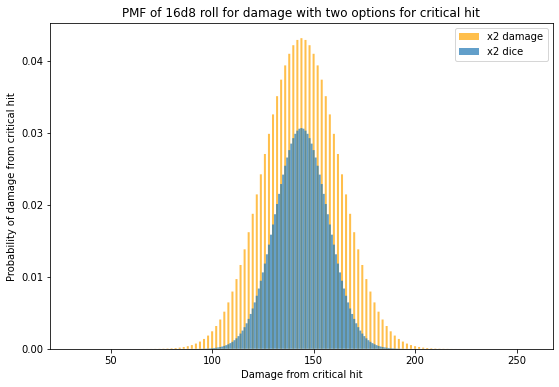

In [18]:
from matplotlib import pyplot as plt
import numpy as np

from dndrv import My_rv

d8 = My_rv(values=(np.arange(1, 9), [1/8]*8))

rv = sum(16 * [d8])
double_damage_crit = 2 * rv
double_dice_crit = rv + rv
plt.figure(figsize=(9, 6))
double_damage_crit.plot(color='orange', width=1, alpha=0.7, label='x2 damage')
double_dice_crit.plot(alpha=0.7, width=1, label='x2 dice')
plt.legend()
plt.xlabel('Damage from critical hit')
plt.ylabel('Probability of damage from critical hit')
plt.title('PMF of 16d8 roll for damage with two options for critical hit')
plt.savefig('critical_pmf.png')

Well, this is a little bit unexpected, but understandable. Double-damage distribution can only have even numbers; thus it is "rarefied". But in this form is quite meaningless; it is impossible to compare the two distributions.

## Building a proxy distribution for comparison
Let's build a proxy distribution of double-dice damage: for each odd value of damage, move its probability mass to the previous even value (thus rarefying the distribution). This should be close enough.

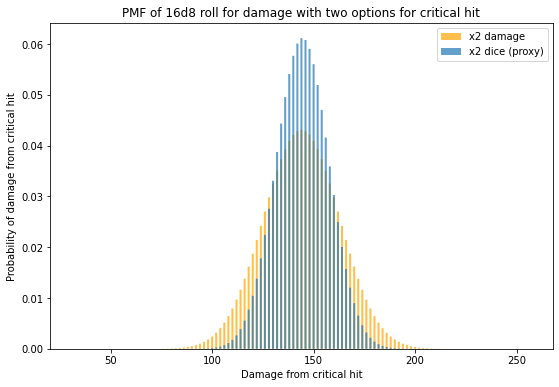

In [19]:
new_p = np.append([0], double_dice_crit.pk)
new_p = (np.roll(new_p, -1) + new_p)[:-1]
new_p[1::2] = 0

plt.figure(figsize=(9, 6))
double_damage_crit.plot(color='orange', width=1, alpha=0.7,
                        label='x2 damage')
double_dice_proxy = My_rv(values=(double_dice_crit.xk, new_p))
double_dice_proxy.plot(width=1, alpha=0.7,
                       label='x2 dice (proxy)')
plt.legend()
plt.xlabel('Damage from critical hit')
plt.ylabel('Probability of damage from critical hit')
plt.title('PMF of 16d8 roll for damage with two options for critical hit')
plt.savefig('critical_pmf_with_proxy.png')

This is more like what I expected. Now it is obvious, that the double-dice distribution is more "stable": it gives values around the mean more often than the double-damage distribution. The double damage distribution is more "risky": there is a higher probability to roll a higher number as well as a lower number.

## Conclusion

I've compared the two ways of calculating critical hit damage: double the dice and double the damage. Of the two, double-dice distribution is more stable, double-damage distribution is more exciting.